<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/SubmittedMachinfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Unsupervised Textual Similarity</h1>

---

# Business Problem:

Finding the Similarity between multiple long sentences in terms of meaning

##Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [4]:
!pip install spacy

     ---------------------------------------- 12.2/12.2 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.9 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 481.4/481.4 kB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 4.0 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


###Getting to know the Data

In [2]:
data=pd.read_csv('../input/task-finding-semantic-textual-similarity/Text_Similarity_Dataset.csv')
data.head(1)
#copydata=data.copy()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...


In [3]:
copydata=data.copy()
copydata.shape

(4023, 3)

**Remove Index and check for missing or duplicates**

In [4]:
copydata[copydata.duplicated()].sum()

Unique_ID    0.0
text1        0.0
text2        0.0
dtype: float64

In [5]:
copydata

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...
...,...,...,...
4018,4018,labour plans maternity pay rise maternity pay ...,no seasonal lift for house market a swathe of ...
4019,4019,high fuel costs hit us airlines two of the lar...,new media battle for bafta awards the bbc lead...
4020,4020,britons growing digitally obese gadget lover...,film star fox behind theatre bid leading actor...
4021,4021,holmes is hit by hamstring injury kelly holmes...,tsunami to hit sri lanka banks sri lanka s b...


##Functions

All Functions Used in Notebook:


1.   Remove Punctuation
2.   Lower Case
3.   Tokenize
4.   Remove Stop Words
5.   Remove Digits
6.   Lemmatize
7.   Remove empty tokens
8.   Remove single meaningless letters
9.   Detokenize
10.  Remove Spaces
11.  Count Vectorizer + Cosine Similarity
12.  Tf-Idf Vectorizer + Cosine Similarity




In [6]:
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['text1']=data['text1'].map(lambda m:re.sub(pattern," ",m))
  copydata['text2']=data['text2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['text1']=copydata['text1'].map(lambda m:m.lower())
  copydata['text2']=copydata['text2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: tokenization(x))
  copydata['text2']= copydata['text2'].apply(lambda x: tokenization(x))
  return copydata


sw=nltk.corpus.stopwords.words('english')

def remove_SW(copydata):
   copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if item not in sw])
   copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if item not in sw])
   return copydata


def remove_digits(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['text2']=copydata['text2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if item !=''])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['text2']= copydata['text2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['text2']= copydata['text2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata
def count_vcr():
  for i in range(len(copydata)):
    doc1=copydata['text1'][i]
    doc2=copydata['text2'][i]
    docs=(doc1,doc2)
    matrix = CountVectorizer().fit_transform(docs)
    cosine_sim = cosine_similarity(matrix[0], matrix[1])
    similarity.append(cosine_sim)
  return similarity

def similarity_fn():
  for i in range(len(copydata)):
    doc1=copydata['text1'][i]
    doc2=copydata['text2'][i]
    docs=(doc1,doc2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity.append(cosine_sim)
  return similarity

##Preprocessing Pipeline

In [7]:
copydata=copydata.pipe(remove_punc).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [8]:
copydata[:5]

,Unique_ID,text1,text2
0,0,"[savvy, searcher, fail, spot, ad, internet, se...","[newcastle, bolton, kieron, dyer, smashed, hom..."
1,1,"[million, miss, net, uk, population, still, wi...","[nasdaq, planning, 100m, share, sale, owner, t..."
2,2,"[young, debut, cut, short, ginepri, fifteen, y...","[ruddock, back, yapp, credential, wale, coach,..."
3,3,"[diageo, buy, wine, firm, diageo, world, bigge...","[mci, share, climb, takeover, bid, share, phon..."
4,4,"[careful, code, new, european, directive, coul...","[medium, gadget, get, moving, pocket, sized, d..."


##Word Cloud

**Stack and Concatinate both texts creating a combined Word Cloud**

In [9]:
def stack_concat():
  stack1=copydata['text1'].apply(pd.Series).stack()
  stack2=copydata['text2'].apply(pd.Series).stack()
  temp=pd.concat([stack1,stack2])
  return temp
ct=stack_concat()
stacked=ct.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

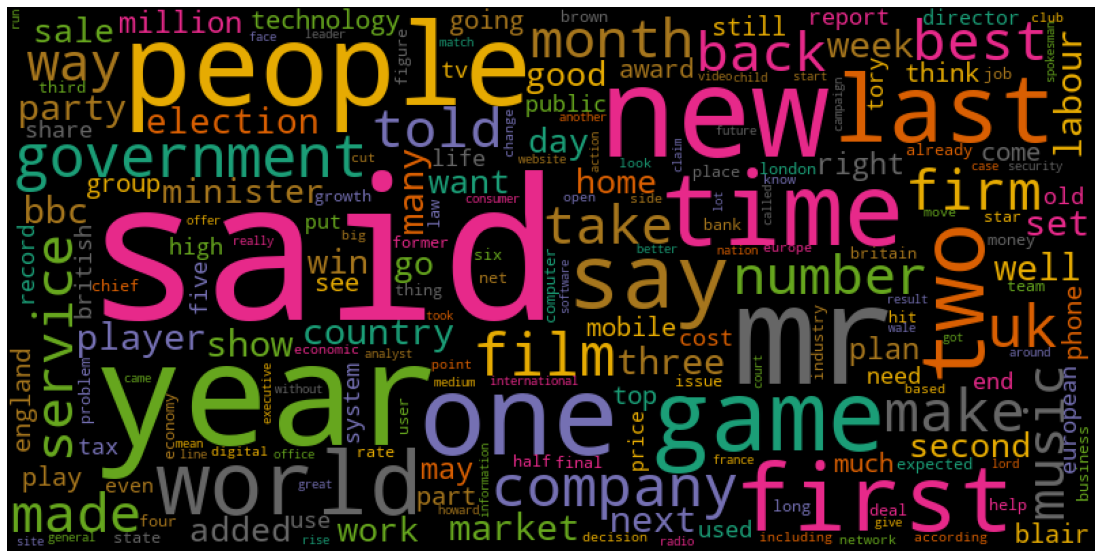

In [10]:
word_cloud = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked)
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud)
plt.axis("off")

##Frequency Distribution

**Frequency Distribution Graph to Display Word Occurrence and Differences**

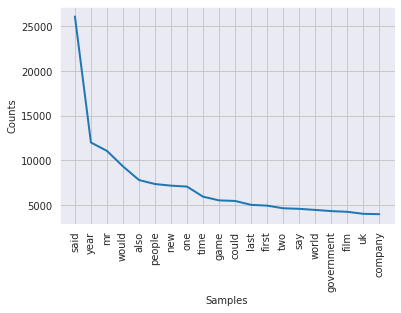

In [11]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(ct)
nlp_words.plot(20);

In [12]:
counts = Counter(ct)
print(counts.most_common(10))

[('said', 26113), ('year', 12011), ('mr', 11069), ('would', 9337), ('also', 7807), ('people', 7362), ('new', 7179), ('one', 7073), ('time', 5945), ('game', 5531)]


##Count Vecotrizer and Cosine Similarity

In [13]:
bow_converter = CountVectorizer()
copydata.pipe(detoken).pipe(remove_space)
similarity=[]
similarity=count_vcr()
data_cvr=copydata.copy()
data_cvr['Similarity']=similarity
data_cvr[:5]

,Unique_ID,text1,text2,Similarity
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.05912507201975728]]
1,1,million miss net uk population still without i...,nasdaq planning 100m share sale owner technolo...,[[0.06181336224414779]]
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.1066335554330038]]
3,3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.08999200106650865]]
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.12784641213518705]]


##Tf-Idf Vecotrizer and Cosine Similarity

In [14]:
tfidf_vectorizer = TfidfVectorizer()
similarity=[]
similarity=similarity_fn()
data_tf=copydata.copy()
data_tf['Similarity']=similarity

##Combined Similarities

In [15]:
all_data=data_cvr.copy()
all_data['Count-Vec Similarity']=all_data['Similarity']
all_data=all_data.drop('Similarity',axis=1)
all_data['Tf-idf Similarity']=data_tf['Similarity']

In [16]:
all_data

,Unique_ID,text1,text2,Count-Vec Similarity,Tf-idf Similarity
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.05912507201975728]],[[0.03197829363188224]]
1,1,million miss net uk population still without i...,nasdaq planning 100m share sale owner technolo...,[[0.06181336224414779]],[[0.03266693064041717]]
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.1066335554330038]],[[0.057382425433443775]]
3,3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.08999200106650865]],[[0.048594384898646766]]
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.12784641213518705]],[[0.07308247572327135]]
...,...,...,...,...,...
4018,4018,labour plan maternity pay rise maternity pay n...,seasonal lift house market swathe figure provi...,[[0.13715374901422514]],[[0.07573441421341853]]
4019,4019,high fuel cost hit airline two largest airline...,new medium battle bafta award bbc lead nominat...,[[0.06175569747293412]],[[0.03266551617825478]]
4020,4020,briton growing digitally obese gadget lover hu...,film star fox behind theatre bid leading actor...,[[0.14597412144408584]],[[0.080999616833927]]
4021,4021,holmes hit hamstring injury kelly holmes force...,tsunami hit sri lanka bank sri lanka bank face...,[[0.05640302949958496]],[[0.029401746033265775]]
